I wrote GD in the form of a module, just to be able to add more algorithms and test it easiy.

It includes more algorithm. You can find them in [1609.04747](https://arxiv.org/abs/1609.04747).

This is how it works

In [1]:
import numpy as np
import time

import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
import GD

In [3]:
class func(GD.Function):
    def __init__(self,x0):
        GD.Function.__init__(self,x0)
    
    def __call__(self,x):
#         return np.log(1+(x[0]-2)**2+(x[1]-3*x[0]**2)**2)
#         return (x[0]-2)**2+(x[1]-3*x[0]**2)**2
        return (x[0]-1)**2+(x[1]-x[0])**2

f=func([0,0])


# gd=GD.VanillaGD(f,alpha=1e-2)
# gd=GD.RMSpropGD(f,gamma=0.995,epsilon=1e-6,alpha=1e-1)
# gd=GD.AdaDeltaGD(f,gamma=0.99,epsilon=1e-5,alpha=1)
# gd=GD.AdamGD(f,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
# gd=GD.AdaMaxGD(f,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
gd=GD.NAdamGD(f,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)


In [4]:
time0=time.time()

gd.run(abs_tol=1e-4, rel_tol=1e-2, step_break=500,max_step=15000)
print(len(gd.steps),f.x,f.minimum)

time.time()-time0

534 [1.000000000000034, 1.0000000000000346] [0.9999999999999978, 0.9999999999999979]


0.049002885818481445

<IPython.core.display.Javascript object>


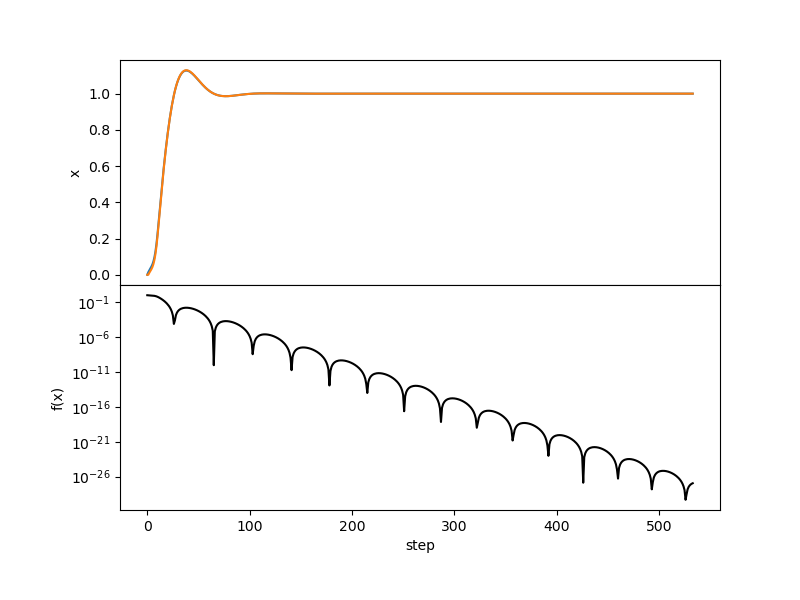

In [5]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)

sub.plot(gd.steps)

sub.set_ylabel('x')
# sub.set_xscale('log')
sub.set_yscale('linear')

sub = fig.add_subplot(212)
# sub.get_xaxis().set_visible(False)

F=[f(x) for x in gd.steps]
sub.plot(F ,c='xkcd:black')

sub.set_ylabel('f(x)')
sub.set_xlabel('step')
sub.set_yscale('log')

plt.show()